In [39]:
%pip install seaborn
%pip install pandas

In [51]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [52]:
# Importing the dataset 1000_Companies_revised.csv
path='1000_Companies_revised.csv'
companies = pd.read_csv(path)

In [53]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [54]:
## Begin pre-processing here!
# Examine datatypes and cast to appropriate types if necessary
print(companies.dtypes)

# Prepare a data quality assessment
# Description of numeric data
numeric_description = companies.describe().T
print(numeric_description)
print()

# Description of categorical data
categorical_description = companies.select_dtypes(include=['object']).describe().T
print(categorical_description)
print()

# The shape of the dataframe
print("Shape of the DataFrame:", companies.shape)
print()

# Details including count for any missing data
missing_data = companies.isnull().sum()
print("Missing data")
print(missing_data)
print()

# Handle missing data (Example: Imputation with median for numeric columns)
## Rationale for Imputation:
# I chose to impute missing values as it retains more data, which can be crucial for analysis
# Imputing missing values helps in retaining the maximum amount of data. 
# This is especially crucial in datasets where every data point can significantly impact the model's performance. 
# By using the median, we ensure that the imputation is not heavily affected by outliers.

for column in companies.select_dtypes(include='number').columns:
    median = companies[column].median()
    companies[column].fillna(median, inplace=True)


R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit              object
dtype: object
                  count           mean           std       min           25%  \
R&D Spend        1000.0   81668.927200  46537.567891      0.00   43084.50000   
Administration   1000.0  122963.897612  12613.927535  51283.14  116640.68485   
Marketing Spend  1000.0  226205.058419  91578.393542      0.00  150969.58460   

                          50%            75%        max  
R&D Spend         79936.00000  124565.500000  165349.20  
Administration   122421.61215  129139.118000  321652.14  
Marketing Spend  224517.88735  308189.808525  471784.10  

       count unique          top freq
State   1000      3   California  344
Profit   999    997  180257.1795    2

Shape of the DataFrame: (1000, 5)

Missing data
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             1
dtype: int64



***1st iteration:***
- load the 1000_Companies_revised.csv into a Pandas dataframe
- examine the datatypes in the df and cast all columns to the appropriate type
- prepare a data quality assessment that includes:
  - descriptions of the numeric and categorical data (transposed form)
  - the shape of the dataframe
  - details including count for any missing data
- between the sections labeled "begin preprocessing here" and "end preprocessing here", add code to drop rows with missing data or to impute the missing values using a method of your choice - provide a brief description of your rationale
- run the rest of the code provided
- label and print the r2 value as ('iteration one r2:' r2)

***2nd iteration:***
- repeat the steps from first iteration, adding the following:
- examine the plot from iteration one and develop a strategy to remove extreme values (drop rows) that might be beyond the predictive range of your model and add a brief comment explaining the range for which the model holds
- add code to remove any remaining outlier rows using Mahalanobis distance and - save all outliers to a csv file labeled 'outliers(& your last name).csv
- run the rest of the code
- label and print the r2 value of this iteration as ('iteration two r2:' r2)

**3rd iteration**

- extend the code (after the visualization) as follows:
  - (re)load the 1000_Companies_revised.csv into a Pandas dataframe
  - examine the datatypes in the df and cast all columns to the appropriate type
  - drop all rows with missing data
  - bin the data into 3 buckets based on 'Profit', with appropriate labels for each bucket
- save the dataframe with the new column to a file named "bins (& your last name).csv

**Output**
- r2 values from the first two iterations as a .txt file
- the "Predicted vs Actual" plots for each iteration
- the two .csv files you have created



In [55]:
## End pre-processing here and begin the

In [56]:
## Extracting the Independent and Dependent variables

X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values


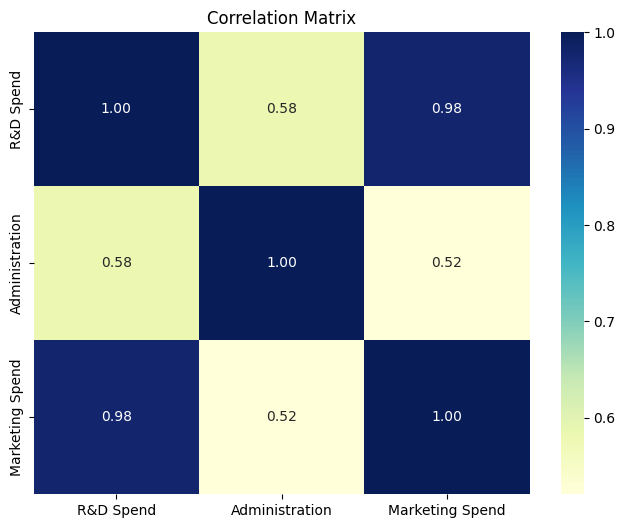

In [57]:
numeric_columns = companies.select_dtypes(include=[np.number])

# Calculate the correlation matrix
columns_order = numeric_columns.columns.tolist()
corr_matrix = numeric_columns[columns_order].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [58]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Create a ColumnTransformer to apply one-hot encoding only to the categorical column
column_transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), [3])  # Apply OneHotEncoder to column 3
    ],
    remainder="passthrough"  # Keep other columns unchanged
)

# Apply the transformations
X = column_transformer.fit_transform(X)


In [59]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [60]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.covariance import EmpiricalCovariance
from scipy.stats import chi2


# Imputation for Training and Testing Data
imputer_X = SimpleImputer(strategy="median")
X_train_imputed = imputer_X.fit_transform(X_train)
imputer_y = SimpleImputer(strategy="median")
y_train_imputed = imputer_y.fit_transform(y_train.reshape(-1, 1))

# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train_imputed, y_train_imputed)

# Convert y_test if needed and Impute X_test
if y_test.dtype.kind in 'UO':
    y_test = pd.Series(y_test).str.replace(',', '').astype(float).values
X_test_imputed = imputer_X.transform(X_test)

# Predicting the Test set results and calculating the R² value for the First Iteration
y_pred = regressor.predict(X_test_imputed)

# Ensure y_test and y_pred are 1-dimensional
y_test = y_test.ravel()
y_pred = y_pred.ravel()

# Check if y_test and y_pred have the same length
if len(y_test) != len(y_pred):
    raise ValueError("The lengths of y_test and y_pred do not match.")

r2_first = r2_score(y_test, y_pred)
print("iteration one r2: ", r2_first)


iteration one r2:  0.9110170357178531


iteration one r2:  0.9110170357178531


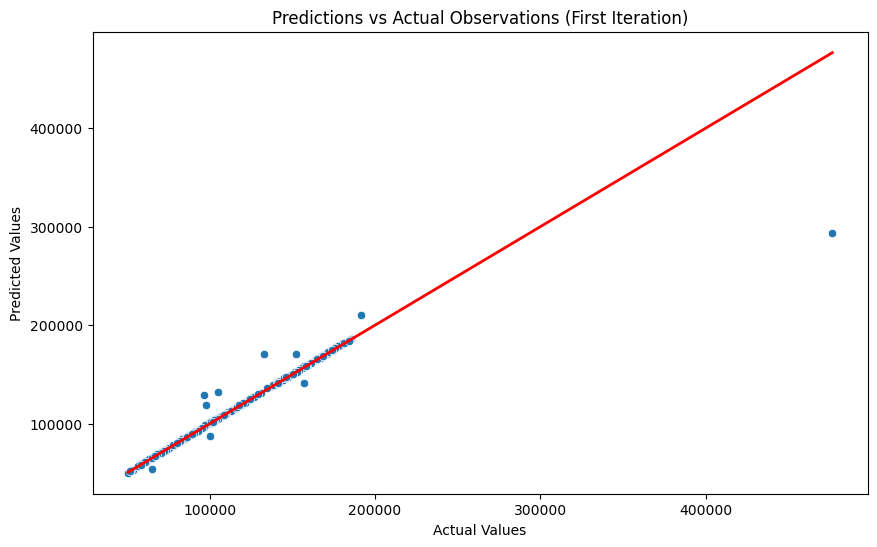

In [63]:
y_pred = regressor.predict(X_test_imputed)

# Ensure y_test and y_pred are 1-dimensional
y_test = y_test.ravel()
y_pred = y_pred.ravel()

# Check if y_test and y_pred have the same length
if len(y_test) != len(y_pred):
    raise ValueError("The lengths of y_test and y_pred do not match.")

r2_first = r2_score(y_test, y_pred)
print("iteration one r2: ", r2_first)

# Visualization for the First Iteration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Observations (First Iteration)')
plt.show()

iteration two r2 without outliers:  0.9999928864687974


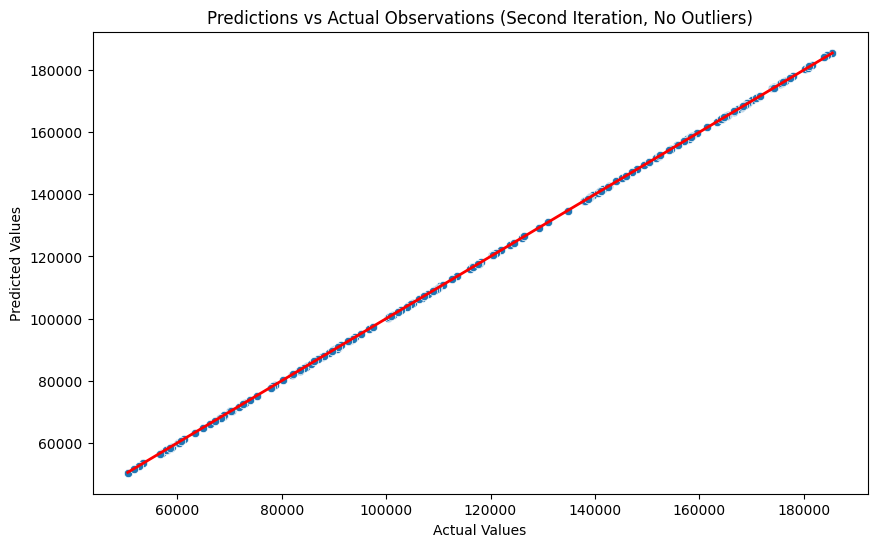

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.covariance import EmpiricalCovariance
from scipy.stats import chi2


# Fit the EmpiricalCovariance on the training data for Mahalanobis distance calculation
cov_matrix = EmpiricalCovariance().fit(X_train)

# Compute Mahalanobis distance for the training set
mahalanobis_distance_train = cov_matrix.mahalanobis(X_train)
threshold = chi2.ppf((1 - 0.05), df=X_train.shape[1])

# Detect and remove outliers from the training set
outliers_train = mahalanobis_distance_train > threshold
X_train_no_outliers = X_train[~outliers_train, :]
y_train_no_outliers = y_train[~outliers_train]

# Compute Mahalanobis distance for the test set
mahalanobis_distance_test = cov_matrix.mahalanobis(X_test)
outliers_test = mahalanobis_distance_test > threshold

# Combine the indices of the outliers from both training and test sets
outlier_indices = np.where(np.concatenate([outliers_train, outliers_test], axis=0))[0]

# Assuming the original dataset is stored in a DataFrame 'companies'
# with the same row order as when 'X' was created
outliers_data = companies.iloc[outlier_indices]

# Save the outliers to a CSV file
outliers_data.to_csv('outliers_Choi.csv', index=False)



# Remove outliers from the test set
X_test_no_outliers = X_test[~outliers_test, :]
y_test_no_outliers = y_test[~outliers_test]

# Re-train the model without outliers in the training set
regressor_no_outliers = LinearRegression()
regressor_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predicting the Test set results without outliers
y_pred_no_outliers = regressor_no_outliers.predict(X_test_no_outliers)

# Calculating the R² value for the Second Iteration
r2_second_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)
print("iteration two r2 without outliers: ", r2_second_no_outliers)

# Save R² values to a text file
with open('r2_values_Choi.txt', 'w') as file:
    file.write(f'iteration one r2: {r2_first}\n')
    file.write(f'iteration two r2: {r2_second_no_outliers}\n')


# Visualization for the Second Iteration without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_no_outliers, y=y_pred_no_outliers)
plt.plot([y_test_no_outliers.min(), y_test_no_outliers.max()], [y_test_no_outliers.min(), y_test_no_outliers.max()], color='red', lw=2, linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Observations (Second Iteration, No Outliers)')
plt.show()

In [67]:
# Reload the dataset
companies = pd.read_csv('1000_Companies_revised.csv')

# Examine datatypes
print("Data Types Before Casting:")
print(companies.dtypes)

# Example of casting columns to appropriate types
# This is dependent on your specific dataset and understanding of the data
# This step assumes 'Profit' is stored as a string; adjust if the column name differs
companies['Profit'] = pd.to_numeric(companies['Profit'], errors='coerce')

# Drop all rows with missing data
companies.dropna(inplace=True)

# Bin the 'Profit' data into 3 buckets
profit_bins = [companies['Profit'].min(), 
               companies['Profit'].quantile(0.33), 
               companies['Profit'].quantile(0.66), 
               companies['Profit'].max()]
profit_labels = ['Low', 'Medium', 'High']
companies['Profit_Bins'] = pd.cut(companies['Profit'], bins=profit_bins, labels=profit_labels, include_lowest=True)

# Save the modified dataframe
companies.to_csv('bins_Choi.csv', index=False)

# Display the first few rows of the modified dataframe
print(companies.head())

Data Types Before Casting:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit              object
dtype: object
   R&D Spend  Administration  Marketing Spend       State     Profit  \
0  165349.20       136897.80        471784.10    New York  192261.83   
1  162597.70       151377.59        443898.53  California  191792.06   
2  153441.51       101145.55        407934.54     Florida  191050.39   
3  144372.41       118671.85        383199.62    New York  182901.99   
4  142107.34        91391.77        366168.42     Florida  166187.94   

  Profit_Bins  
0        High  
1        High  
2        High  
3        High  
4        High  
